# EDA - Disney+ Movies & TV Shows

## Library

In [1]:
# importing path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Files

In [3]:
df_disney_raw = pd.read_csv('/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv')
df_disney_raw.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


## Exploration

In [4]:
df_disney_raw.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [5]:
df_disney_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [6]:
df_disney_raw.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
# categories
df_disney_raw['rating'].unique()

array(['TV-G', 'PG', 'TV-PG', nan, 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y',
       'TV-Y7-FV'], dtype=object)

In [8]:
df_disney_raw['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
df_disney_raw.duplicated().sum()

0

About cleaning and transformation:

1. Change name of "**listed_in**" to "**gender**";
2. Nan as "*No information*"
3. Filter by type of midia and creat two datasets
4. Split column "**duration**"
5. Change type from "**date_added**" > datetime; "**duration**" > float;


Obs: I decided filter by midia first, because the duration and date_added transformation would be different by type of midia

## Cleaning

In [10]:
df_disney_cleaning = df_disney_raw.copy()

1. Renaming columns

In [11]:
df_disney_cleaning = df_disney_cleaning.rename(columns={'listed_in': 'gender'})

2. Fill NaN

In [12]:
df_disney_cleaning = df_disney_cleaning.fillna("No information")

In [13]:
df_disney_cleaning.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
gender          0
description     0
dtype: int64

3. Filter by midia

In [14]:
# Movies
df_disney_movies = df_disney_cleaning[df_disney_cleaning['type']=='Movie']
df_disney_movies.shape

(1052, 12)

In [15]:
df_disney_movies.describe()

,release_year
count,1052.000000
mean,1999.230989
std,23.858584
min,1928.000000
25%,1994.000000
50%,2008.000000
75%,2017.000000
max,2021.000000


In [16]:
# TV Show
df_disney_shows = df_disney_cleaning[df_disney_cleaning['type']=='TV Show']

In [17]:
df_disney_shows.shape

(398, 12)

### Movies

4. Split column "duration"

In [18]:
df_disney_movies_cleaning = df_disney_movies.copy()

In [19]:
df_disney_movies_cleaning['duration'] = df_disney_movies_cleaning['duration'].str.replace(' min', '')

In [20]:
df_disney_movies_cleaning.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",No information,"November 26, 2021",2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",No information,"November 26, 2021",1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...


5. Change type from "date_added" > datetime; "duration" > float;

In [21]:
df_disney_movies_cleaning['duration']= df_disney_movies_cleaning['duration'].astype(float)

In [22]:
df_disney_movies_cleaning['date_added'] = pd.to_datetime(df_disney_movies_cleaning['date_added'])

In [23]:
# Removing hours
df_disney_movies_cleaning['date_added'] = df_disney_movies_cleaning['date_added'].dt.date

In [24]:
df_disney_movies_cleaning.describe()

,release_year,duration
count,1052.000000,1052.000000
mean,1999.230989,71.910646
std,23.858584,40.595585
min,1928.000000,1.000000
25%,1994.000000,44.000000
50%,2008.000000,85.000000
75%,2017.000000,98.000000
max,2021.000000,183.000000


In [25]:
df_disney_movies_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       1052 non-null   object 
 1   type          1052 non-null   object 
 2   title         1052 non-null   object 
 3   director      1052 non-null   object 
 4   cast          1052 non-null   object 
 5   country       1052 non-null   object 
 6   date_added    1052 non-null   object 
 7   release_year  1052 non-null   int64  
 8   rating        1052 non-null   object 
 9   duration      1052 non-null   float64
 10  gender        1052 non-null   object 
 11  description   1052 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 106.8+ KB


In [27]:
# Clean data
df_disney_movies_silver = df_disney_movies_cleaning.copy()

### TV Show

In [28]:
df_disney_shows_cleaning = df_disney_shows.copy()

4. Split column 'duration'

In [29]:
df_disney_shows_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 4 to 1441
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       398 non-null    object
 1   type          398 non-null    object
 2   title         398 non-null    object
 3   director      398 non-null    object
 4   cast          398 non-null    object
 5   country       398 non-null    object
 6   date_added    398 non-null    object
 7   release_year  398 non-null    int64 
 8   rating        398 non-null    object
 9   duration      398 non-null    object
 10  gender        398 non-null    object
 11  description   398 non-null    object
dtypes: int64(1), object(11)
memory usage: 40.4+ KB


In [30]:
df_disney_shows_cleaning['duration']

4         1 Season
6         1 Season
7        2 Seasons
8        2 Seasons
13      10 Seasons
           ...    
1417     4 Seasons
1434     3 Seasons
1439     3 Seasons
1440     2 Seasons
1441     3 Seasons
Name: duration, Length: 398, dtype: object

In [31]:
df_disney_shows_cleaning['duration'] = df_disney_shows_cleaning['duration'].str.replace(' Seasons', '')
df_disney_shows_cleaning['duration'] = df_disney_shows_cleaning['duration'].str.replace(' Season', '')

5. Change type from "date_added" > datetime; "duration" > float;

In [32]:
df_disney_shows_cleaning['date_added'] = pd.to_datetime(df_disney_shows_cleaning['date_added'], errors='coerce')

In [33]:
df_disney_shows_cleaning['date_added'] = df_disney_shows_cleaning['date_added'].dt.date

In [34]:
df_disney_shows_cleaning['duration'] = df_disney_shows_cleaning['duration'].astype(float)

In [35]:
df_disney_shows_cleaning.describe()

,release_year,duration
count,398.000000,398.000000
mean,2013.296482,2.118090
std,9.659051,2.411898
min,1955.000000,1.000000
25%,2011.000000,1.000000
50%,2017.000000,1.000000
75%,2019.000000,2.000000
max,2021.000000,32.000000


In [37]:
# Salve data
df_disney_shows_silver = df_disney_shows_cleaning.copy()

In [38]:
df_disney_all = df_disney_cleaning.copy()

## Analysis

Datasets:

* df_disney_raw = Without cleaning
* df_disney_all = All informations together
* df_disney_shows_silver = Informations about TV Shows
* df_disney_movies_silver = Informations about Movies

### Disney Movies

In [39]:
df_disney_movies_silver.describe()

,release_year,duration
count,1052.000000,1052.000000
mean,1999.230989,71.910646
std,23.858584,40.595585
min,1928.000000,1.000000
25%,1994.000000,44.000000
50%,2008.000000,85.000000
75%,2017.000000,98.000000
max,2021.000000,183.000000


In [40]:
print(f"Mean: {df_disney_movies_silver['duration'].mean():.2f}") 
print(f"Median: {df_disney_movies_silver['duration'].median()}") 
print(f"Standard Deviation: {df_disney_movies_silver['duration'].std():.2f}") 
print(f"Variance: {df_disney_movies_silver['duration'].var():.2f}")

Mean: 71.91
Median: 85.0
Standard Deviation: 40.60
Variance: 1648.00


In [46]:
# Quartis
df_disney_movies_silver['duration'].quantile([0.25, 0.5, 0.75])

0.25    44.0
0.50    85.0
0.75    98.0
Name: duration, dtype: float64

In [47]:
# Min e Max duration
min_duration = df_disney_movies_silver['duration'].min()
max_duration = df_disney_movies_silver['duration'].max()

print(f"Min Duration: {min_duration:.2f}")
print(f"Max Duration: {max_duration:.2f}")

Min Duration: 1.00
Max Duration: 183.00


In [48]:
movie_min = df_disney_movies_silver[df_disney_movies_silver['duration'] == min_duration]
movie_max = df_disney_movies_silver[df_disney_movies_silver['duration'] == max_duration]

print(f"Filme com a menor duração: {movie_min['title'].values[0]}")
print(f"Filme com a maior duração: {movie_max['title'].values[0]}")

Filme com a menor duração: Baymax!
Filme com a maior duração: Marvel Studios' Avengers: Endgame


In [44]:
movie_min

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description
15,s16,Movie,Baymax!,No information,No information,No information,2021-11-12,2021,TV-G,1.0,Animation,“Baymax!” premieres on Disney+ summer 2022.
27,s28,Movie,Obi-Wan Kenobi,No information,No information,No information,2021-11-12,2021,TV-PG,1.0,"Action-Adventure, Science Fiction","A behind the scenes look of the ""Obi-Wan Kenob..."
37,s38,Movie,The Proud Family: Louder and Prouder,No information,"Kyla Pratt, Tommy Davidson, Paula Jai Parker, ...",No information,2021-11-12,2021,TV-G,1.0,"Animation, Comedy, Coming of Age","""The Proud Family: Louder and Prouder"" follows..."


In [45]:
movie_max

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description
1039,s1040,Movie,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",United States,2019-11-12,2019,PG-13,183.0,"Action-Adventure, Fantasy, Science Fiction","The epic finale to the Infinity Saga, this dra..."


#### Outliers

In [49]:
movies_disney_outliers = df_disney_movies_silver.copy()

In [50]:
q1 = movies_disney_outliers['duration'].quantile(0.25)
q3 = movies_disney_outliers['duration'].quantile(0.75)

print(f"Q1: {q1} \nQ3: {q3}")

Q1: 44.0 
Q3: 98.0


In [51]:
# IQR
iqr = q3 - q1
print(f"IQR: {iqr}")

IQR: 54.0


<Axes: >

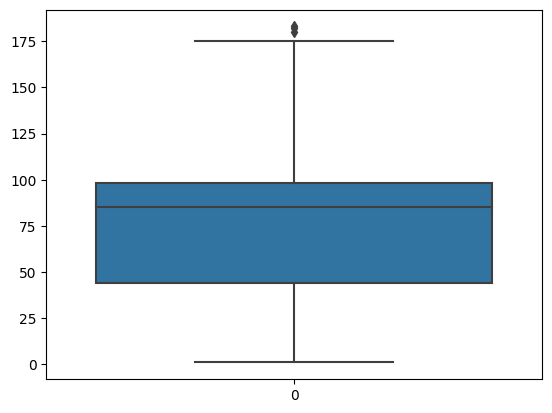

In [52]:
# Boxplot
sns.boxplot(movies_disney_outliers['duration'])

In [55]:
# IQR Outliers
outliers_iqr = movies_disney_outliers[(movies_disney_outliers['duration'] < (q1 - 1.5 * iqr)) | (movies_disney_outliers['duration'] > (q3 + 1.5 * iqr))]

In [56]:
outliers_iqr

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description
330,s331,Movie,Arendelle Castle Yule Log,No information,No information,United States,2020-12-18,2020,TV-G,180.0,"Animation, Family",Set the wintry mood for your holiday celebrati...
333,s334,Movie,Dory's Reef Cam,Michal Makarewicz,No information,United States,2020-12-18,2020,TV-G,182.0,"Animation, Family",Dive into the waters below and watch the aquat...
1039,s1040,Movie,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",United States,2019-11-12,2019,PG-13,183.0,"Action-Adventure, Fantasy, Science Fiction","The epic finale to the Infinity Saga, this dra..."


In [57]:
outliers_iqr.describe()

,release_year,duration
count,3.000000,3.000000
mean,2019.666667,181.666667
std,0.577350,1.527525
min,2019.000000,180.000000
25%,2019.500000,181.000000
50%,2020.000000,182.000000
75%,2020.000000,182.500000
max,2020.000000,183.000000


In [58]:
# Removing outliers
movies_no_outliers = movies_disney_outliers.drop(outliers_iqr.index)

In [60]:
movies_no_outliers.describe()

,release_year,duration
count,1049.000000,1049.000000
mean,1999.172545,71.596759
std,23.867593,40.226013
min,1928.000000,1.000000
25%,1994.000000,44.000000
50%,2008.000000,85.000000
75%,2017.000000,98.000000
max,2021.000000,175.000000


### Disney TV Shows

In [63]:
df_disney_shows_silver.shape

(398, 12)

In [64]:
df_disney_shows_silver.describe()

,release_year,duration
count,398.000000,398.000000
mean,2013.296482,2.118090
std,9.659051,2.411898
min,1955.000000,1.000000
25%,2011.000000,1.000000
50%,2017.000000,1.000000
75%,2019.000000,2.000000
max,2021.000000,32.000000


In [70]:
# Quartis
df_disney_shows_silver['duration'].quantile([0.25, 0.5, 0.75])

0.25    1.0
0.50    1.0
0.75    2.0
Name: duration, dtype: float64

In [71]:
# Min e Max duration
min_duration = df_disney_shows_silver['duration'].min()
max_duration = df_disney_shows_silver['duration'].max()

print(f"Min Duration: {min_duration:.2f}")
print(f"Max Duration: {max_duration:.2f}")

Min Duration: 1.00
Max Duration: 32.00


In [72]:
movie_min = df_disney_shows_silver[df_disney_shows_silver['duration'] == min_duration]
movie_max = df_disney_shows_silver[df_disney_shows_silver['duration'] == max_duration]

print(f"Filme com a menor duração: {movie_min['title'].values[0]}")
print(f"Filme com a maior duração: {movie_max['title'].values[0]}")

Filme com a menor duração: The Beatles: Get Back
Filme com a maior duração: The Simpsons


In [75]:
movie_min.shape[0]

219

In [76]:
movie_max.shape[0]

1

In [78]:
movie_max

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description
92,s93,TV Show,The Simpsons,No information,"Dan Castellaneta, Julie Kavner, Nancy Cartwrig...",United States,2021-09-29,1989,TV-PG,32.0,"Animation, Comedy","The world’s favorite nuclear family, in the aw..."


#### Outliers

In [79]:
shows_disney_outliers = df_disney_shows_silver.copy()

In [80]:
q1 = shows_disney_outliers['duration'].quantile(0.25)
q3 = shows_disney_outliers['duration'].quantile(0.75)

print(f"Q1: {q1} \nQ3: {q3}")

Q1: 1.0 
Q3: 2.0


In [81]:
iqr = q3 - q1
print(f"IQR: {iqr}")

IQR: 1.0


<Axes: ylabel='duration'>

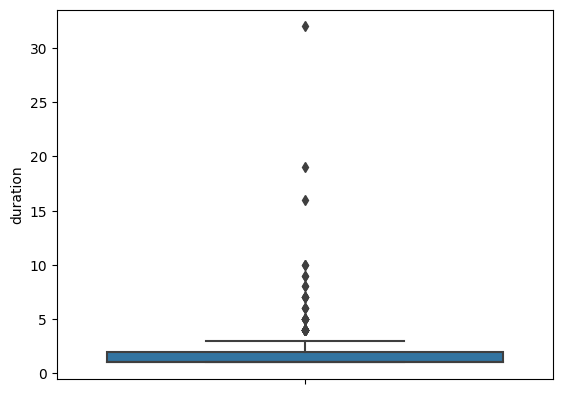

In [84]:
# Boxplot
sns.boxplot(y=shows_disney_outliers['duration'])

In [85]:
# IQR Outliers
shows_outliers_iqr = shows_disney_outliers[(shows_disney_outliers['duration'] < (q1 - 1.5 * iqr)) | (shows_disney_outliers['duration'] > (q3 + 1.5 * iqr))]

In [86]:
shows_outliers_iqr.shape

(52, 12)

In [88]:
shows_outliers_iqr.describe()

,release_year,duration
count,52.000000,52.000000
mean,2006.211538,6.250000
std,10.794582,4.668942
min,1973.000000,4.000000
25%,2001.750000,4.000000
50%,2011.000000,5.000000
75%,2013.250000,7.000000
max,2017.000000,32.000000


In [89]:
# Removing outliers
shows_no_outliers = shows_disney_outliers.drop(shows_outliers_iqr.index)

In [90]:
shows_no_outliers.describe()

,release_year,duration
count,346.000000,346.000000
mean,2014.361272,1.497110
std,9.023936,0.715252
min,1955.000000,1.000000
25%,2013.250000,1.000000
50%,2017.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,3.000000


In [93]:
shows_no_outliers.shape

(346, 12)